<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practicing K-Means:  Isotopic Composition Plutonium Batches

_Authors: Dave Yerrington (SF)_


---

We have a nice [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html)

    Pu238 : the percentages of (238)Pu, always less than 2 percent.

    Pu239 : the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240 : percentage of the plutonium 240 isotope.

    Pu241 : percentage of the plutonium 241 isotope.
    
This data is fairly odd and you will see that K-Means may not be ideal in a certain respect but the takeaway is that it can do an ok job with whispy, elongated shapes.  A more ideal model would be DBSCAN or a hierachical clustering model.

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline



In [138]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241
0,1,0.126,75.804,21.204,2.180
1,2,0.133,75.515,21.408,2.240
2,3,0.127,75.175,21.668,2.305
3,4,0.156,78.872,18.428,1.906
4,5,0.503,73.317,20.223,4.128


###  Use Pu239 and Pu240 as our features.
1. Select only columns "Pu239" and "Pu240" to use for our example.
1. Plot "Pu239" and "Pu240" for visual reference.


In [139]:
df = df[['Pu239', 'Pu240']]

In [140]:
df.head(5)

,Pu239,Pu240
0,75.804,21.204
1,75.515,21.408
2,75.175,21.668
3,78.872,18.428
4,73.317,20.223


In [141]:
df.shape

(45, 2)

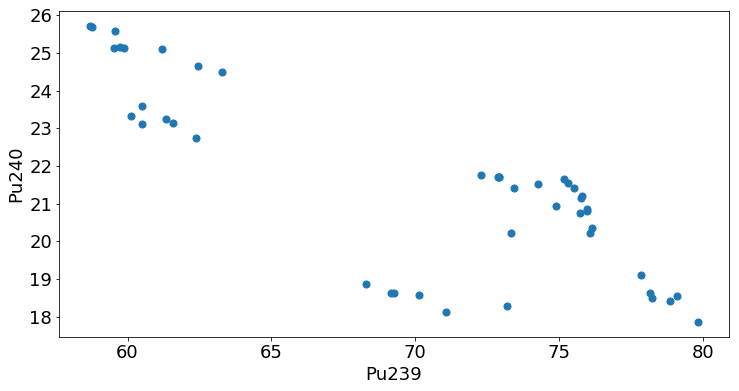

In [142]:
# # Plot the scatter
ax = df.plot(kind="scatter", x="Pu239", y="Pu240", figsize=(12,6), s=50)
plt.xlabel("Pu239", fontsize=18)
plt.ylabel("Pu240", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

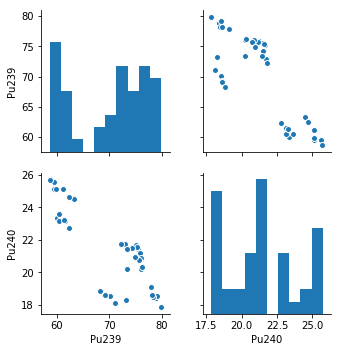

In [143]:
sns.pairplot(df)

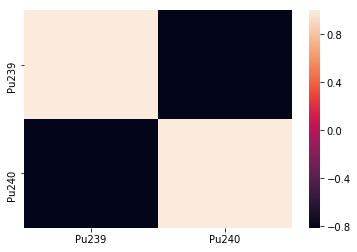

In [144]:
corr = df.corr()

sns.heatmap(corr)

### Next, use K-Means to cluster this data using "Pu239" and "Pu240" features
Initialize an instance of `KMeans` from `sklearn`, initialized for K=3 clusters.  Fit our sliced dataframe with the `fit`.

In [145]:
from sklearn.cluster import KMeans, k_means, DBSCAN
from sklearn.metrics import silhouette_score


In [147]:
kmeans = KMeans(n_clusters=3)
model = kmeans.fit(df[['Pu239', 'Pu240']])

### Assign clusters assignments (predictions) back to the original dataframe

In [149]:
df['predicted'] = model.labels_
df.head()

,Pu239,Pu240,predicted
0,75.804,21.204,2
1,75.515,21.408,2
2,75.175,21.668,2
3,78.872,18.428,2
4,73.317,20.223,0


In [150]:
df['predicted'].value_counts()

2    18
1    15
0    12
Name: predicted, dtype: int64

In [151]:
colors = ["red", "green", "blue"]
df['color'] = df['predicted'].map(lambda p: colors[p])

In [152]:
df.head()

,Pu239,Pu240,predicted,color
0,75.804,21.204,2,blue
1,75.515,21.408,2,blue
2,75.175,21.668,2,blue
3,78.872,18.428,2,blue
4,73.317,20.223,0,red


### Reference the coordinates for the centroids, plot with your "Pu239" and "Pu240" scatter plot
Plot the centroids from the model object with the scatter of "Pu239" and "Pu240".

In [153]:
centers = model.cluster_centers_
centers

array([[ 71.57316667,  19.97391667],
       [ 60.63393333,  24.38753333],
       [ 76.593     ,  20.19483333]])

In [154]:
## Create a dataframe for cluster_centers (centroids)
centroids = pd.DataFrame(centers, columns = [['0', '1']]).T
centroids

,0,1,2
0,71.573167,60.633933,76.593000
1,19.973917,24.387533,20.194833


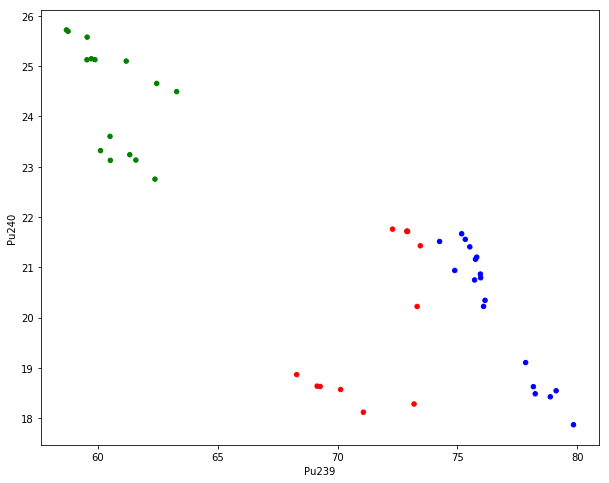

In [155]:
plt.figure(figsize = (5, 5))

# Plot scatter by cluster / color

ax = df.plot(kind = "scatter",
            x = "Pu239",
            y = "Pu240",
            figsize = (10, 8),
            c = df['color'])

### Scale your data, rerun your model, then plot.
This should help slightly but you should compare before and after.

In [156]:
df2= df[['Pu239', 'Pu240']]

In [157]:
df2.head()

,Pu239,Pu240
0,75.804,21.204
1,75.515,21.408
2,75.175,21.668
3,78.872,18.428
4,73.317,20.223


In [158]:
# A:

from sklearn.preprocessing import StandardScaler

X = df2[['Pu239', 'Pu240']]

ss = StandardScaler()

In [159]:
Xs = ss.fit_transform(X)

In [160]:
df_scaled = pd.DataFrame(Xs, columns = ['Pu239', 'Pu240'])

In [161]:
df_scaled.head()

,Pu239,Pu240
0,0.832106,-0.138176
1,0.791133,-0.052625
2,0.742931,0.056409
3,1.267063,-1.302330
4,0.479518,-0.549572


In [162]:
df_scaled.columns

Index(['Pu239', 'Pu240'], dtype='object')

In [163]:
kmeans2 = KMeans(n_clusters=3)
model_scaled = kmeans2.fit(df_scaled[['Pu239', 'Pu240']])

In [164]:
df_scaled['predicted'] = model_scaled.labels_
df_scaled.head()

,Pu239,Pu240,predicted
0,0.832106,-0.138176,2
1,0.791133,-0.052625,2
2,0.742931,0.056409,2
3,1.267063,-1.302330,1
4,0.479518,-0.549572,2


In [165]:
df_scaled['predicted'].value_counts()  

2    18
0    15
1    12
Name: predicted, dtype: int64

In [166]:
df['predicted'].value_counts()

2    18
1    15
0    12
Name: predicted, dtype: int64

In [167]:
colors_scaled = ["red", "green", "blue"]
df_scaled['color'] = df_scaled['predicted'].map(lambda p: colors[p])

In [168]:
df_scaled.head()

,Pu239,Pu240,predicted,color
0,0.832106,-0.138176,2,blue
1,0.791133,-0.052625,2,blue
2,0.742931,0.056409,2,blue
3,1.267063,-1.302330,1,green
4,0.479518,-0.549572,2,blue


In [169]:
centers_scaled = model_scaled.cluster_centers_
centers_scaled

array([[-1.31858916,  1.19688286],
       [ 0.63767668, -1.2653207 ],
       [ 0.67370652, -0.15385525]])

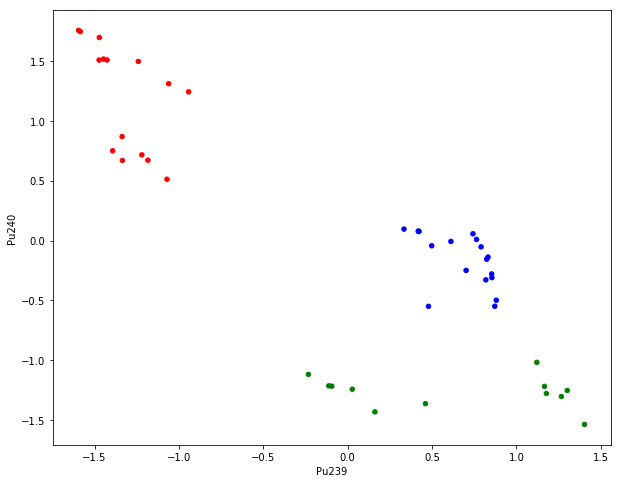

In [170]:
plt.figure(figsize = (5, 5))

# Plot scatter by cluster / color

ax = df_scaled.plot(kind = "scatter",
            x = "Pu239",
            y = "Pu240",
            figsize = (10, 8),
            c = df_scaled['color'])

### Might as well check that silhouette score
Just to confirm what your eyes are telling you.

In [172]:
silhouette_score(df[['Pu239', 'Pu240']], df['predicted']) 

0.59506192791811785

In [173]:
silhouette_score(df_scaled[['Pu239', 'Pu240']], df_scaled['predicted'])   
#better silhouette score with scaled data. 
#The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
#a silhouette score can range from -1 to +1

#Negative values generally indicate that a sample has been assigned to the wrong cluster

0.63321747768623204

In [174]:
# might as well look at inertia:
#     low inertia = dense cluster

In [175]:
model_scaled.inertia_

9.7439599063765971

In [176]:
model.inertia_

183.35354175000006

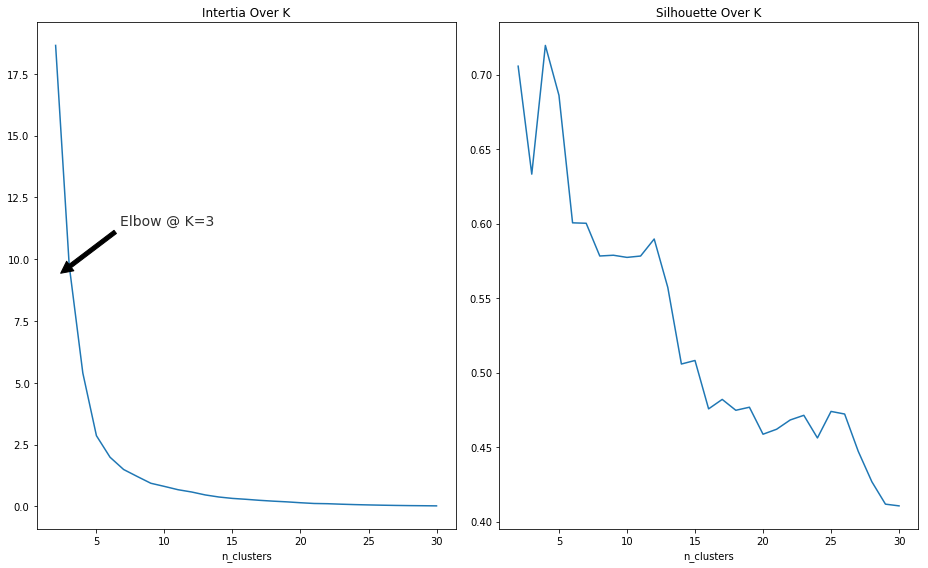

In [177]:
from sklearn.model_selection import ParameterGrid

class eval_kmeans:
    
    param_grid = dict(n_clusters=np.arange(2, 31))
    model = None
    scores = []
    
    def __init__(self, param_grid = None):
        
        if param_grid:
            self.param_grid = ParameterGrid(param_grid)
    
    def fit(self, X, scorer="silhouette"):
        
        ## This isn't very smart ATM.  Only one param, K, is being searched.
        for param, values in self.param_grid.items():
            
            for value in values:
        
                estimator = KMeans(n_clusters = value)
                model = estimator.fit(X)
                
                # Populate scores
                score    = silhouette_score(X, model.labels_)
                
                self.scores.append({
                    param:        value,
                    "inertia":    model.inertia_,
                    "silhouette": score
                })
                
    def get_scores(self):
        return pd.DataFrame(self.scores)
    
kmeans = eval_kmeans()
kmeans.fit(df_scaled[["Pu239", "Pu240"]])

eval_scores = kmeans.get_scores()
eval_scores.set_index("n_clusters", inplace=True)

fig, ax = plt.subplots(ncols=2, figsize=(13, 8))
eval_scores["inertia"].plot(ax=ax[0], title="Intertia Over K")
eval_scores["silhouette"].plot(ax=ax[1], title="Silhouette Over K")

# Add the arrow!
# ax[0].arrow(3, 370, 5, 105, head_width=3, head_length=10, fc='k', ec='k')
ax[0].annotate('Elbow @ K=3', xy = (0.05, .5),  xycoords = 'axes fraction', \
    xytext = (0.2, 0.6), fontsize = 14, \
    color = '#303030', arrowprops=dict(facecolor='black', shrink=0.05))

fig.tight_layout()


In [178]:
# ^^^this is showing that a k of 5 might be better than 3... let's see:

In [179]:
kmeans5 = KMeans(n_clusters= 5)
model_scaled5 = kmeans5.fit(df_scaled[['Pu239', 'Pu240']])

In [105]:
predictions = model_scaled5.labels_

In [107]:
silhouette_score(df_scaled[['Pu239', 'Pu240']], predictions)

0.68610820181904131

In [108]:
model_scaled5.inertia_

2.8567755357820657

In [109]:
#let's take a look at DBSCAN with the scaled data

In [110]:
dbscan_scaled = DBSCAN(eps = 0.3, min_samples = 3)  #defaults are eps = 0.5 and samples = 5

In [111]:
db = dbscan_scaled.fit(df_scaled[['Pu239', 'Pu240']])

In [112]:
labels = db.labels_

labels   #-1 means that they are not categorized
#so it creates 5 clusters 0 thru 4

array([ 0,  0,  0,  1, -1,  1,  0,  0,  2,  2,  2,  2,  2,  2,  2,  2,  1,
        1,  0,  1,  2, -1,  0,  0,  0,  0,  0,  0,  3,  3,  3,  3,  3,  0,
        0,  1,  4,  4,  4,  4,  4,  0,  0,  0,  4])

In [383]:
silhouette_score(df_scaled[['Pu239', 'Pu240']], labels)

0.6008680241025961

In [384]:
db.inertia_   #can't calculate intertia for dbscan

AttributeError: 'DBSCAN' object has no attribute 'inertia_'

In [113]:
len(db.core_sample_indices_) #ask Dave?

40

In [393]:
db.components_

array([[ 0.83210552, -0.13817571],
       [ 0.79113334, -0.05262549],
       [ 0.74293077,  0.05640909],
       [ 1.26706282, -1.30232955],
       [ 1.30165526, -1.2520059 ],
       [ 0.82459159, -0.15578898],
       [ 0.76433838,  0.00985971],
       [-1.47183553,  1.69528273],
       [-1.59446854,  1.75525175],
       [-1.58454448,  1.74392893],
       [-1.44702538,  1.51495631],
       [-1.47311148,  1.50656903],
       [-1.42590132,  1.50740776],
       [-1.24088851,  1.49566557],
       [ 1.17802984, -1.27716773],
       [ 1.16697161, -1.21803743],
       [ 0.61235851, -0.00775357],
       [-1.06041242,  1.30946806],
       [ 0.85535617, -0.31011485],
       [ 0.85379668, -0.2795013 ],
       [ 0.41827228,  0.07737728],
       [ 0.42139127,  0.07863537],
       [ 0.42309254,  0.07528046],
       [ 0.87251061, -0.54873284],
       [ 0.02754793, -1.2415218 ],
       [-0.09380913, -1.21635998],
       [-0.11167244, -1.21342443],
       [-0.23260418, -1.11739013],
       [ 0.81934602,